### Install Dependencies

In [0]:
!pip install tensorflow_datasets --user

In [0]:
try:
  %tensorflow_version 2.x
except:
  pass

import logging
import math
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

tf.get_logger().setLevel(logging.ERROR)
tfds.disable_progress_bar()

### Data and Data!!!

In [0]:
dataset, metadata = tfds.load("fashion_mnist", as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset["train"], dataset["test"]

In [0]:
print(dataset, "\n")
print(metadata)

{'test': <_OptionsDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>, 'train': <_OptionsDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>} 

tfds.core.DatasetInfo(
    name='fashion_mnist',
    version=1.0.0,
    description='Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.',
    urls=['https://github.com/zalandoresearch/fashion-mnist'],
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    = {Han Xiao and
                   Kashif Rasul and
                   Roland Vollg

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples : {}".format(num_train_examples))
print("Number of testing exaples :   {}".format(num_test_examples))

Number of training examples : 60000
Number of testing exaples :   10000


### Preprocess the Data

In [0]:
def normlize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

(28, 28, 1)
(28, 28)
tf.Tensor(3, shape=(), dtype=int64)
[[  0   0   0   0   0   0   0   0   0  35 153 159 128  71   5  38  74  68
   21   5   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 161 254 186 104 120 117 101  93  79
   65  60   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  65 126 183 115  74  85 101  82  68
   68  49   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 161 145  79  93  87  87  85
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   2   0 159 153  90  95  90  82  68
    5   2   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 123 148 101  93  85  82  63
    2   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 115 156  90  87  82  79  57
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 159 142 115  90  82  71  63
   10   0   0   0   0   0   0   0   0   0]
 [  0  

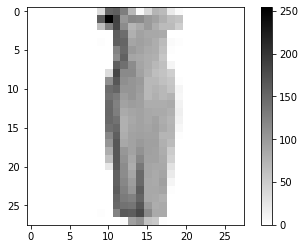

tf.Tensor(
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.13725491 0.6        0.62352943
  0.5019608  0.2784314  0.01960784 0.14901961 0.2901961  0.26666668
  0.08235294 0.01960784 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.6313726  0.99607843 0.7294118
  0.40784314 0.47058824 0.45882353 0.39607844 0.3647059  0.30980393
  0.25490198 0.23529412 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.25490198 0.49411765 0.7176471
  0.4509804  0.2901961  0.33333334 0.39607844 0.32156864 0.26666668
  0.26666668 0.19215687 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.       

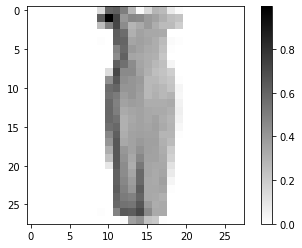

In [0]:
for train_img, train_label in train_dataset.take(1):
  break

print(train_img.shape)
train_img = train_img.numpy().reshape((28, 28))
print(train_img.shape)
print(train_label)
print(train_img)

plt.figure()
plt.imshow(train_img, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

#####

train_img, train_label = normlize(train_img, train_label)
print(train_img)

plt.figure()
plt.imshow(train_img, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_dataset = train_dataset.map(normlize)
test_dataset = test_dataset.map(normlize)

### Caching, makes the training faster.

train_dataset = train_dataset.cache()
test_dataset = test_dataset.cache()

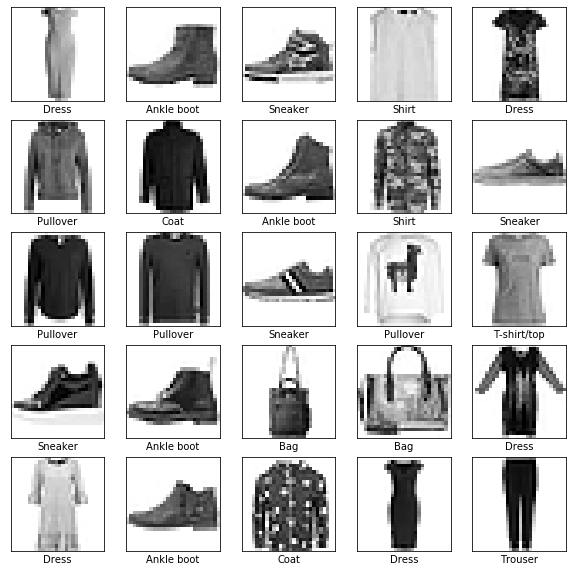

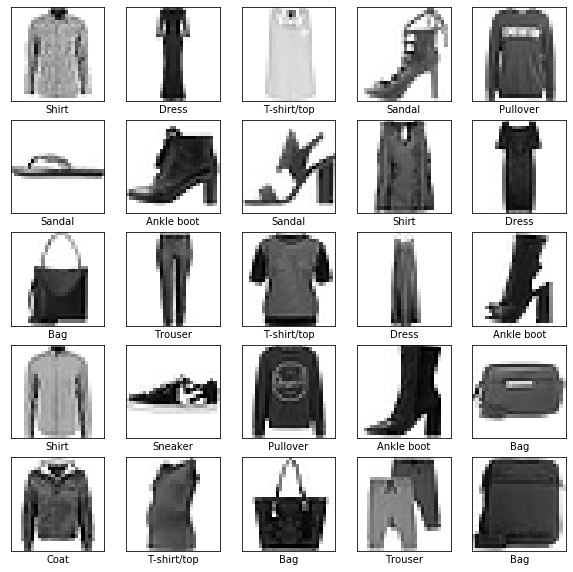

In [0]:
plt.figure(figsize=(10, 10))
i = 0
for train_image, train_label in train_dataset.take(25):
  train_image = train_image.numpy().reshape((28, 28))
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_image, cmap=plt.cm.binary)
  plt.xlabel(class_names[train_label])
  i += 1
plt.show()

print("\n")

plt.figure(figsize=(10, 10))
i = 0
for test_image, test_label in test_dataset.take(25):
  test_image = test_image.numpy().reshape((28, 28))
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(test_image, cmap=plt.cm.binary)
  plt.xlabel(class_names[test_label])
  i += 1
plt.show()

### Build the Model

In [0]:
model_1 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
  tf.keras.layers.Dense(units=128, activation=tf.nn.relu),
  tf.keras.layers.Dense(units=10, activation=tf.nn.softmax)
])

### Compile the model

In [0]:
model_1.compile(loss="sparse_categorical_crossentropy", 
                optimizer="Adam", 
                metrics=["accuracy"])

### Fit the Model

In [0]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [0]:
model_1.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples / BATCH_SIZE))

Train for 1875 steps
Epoch 1/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.4929 - accuracy: 0.8272
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3706 - accuracy: 0.8654
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3295 - accuracy: 0.8792
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3103 - accuracy: 0.8866
Epoch 5/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2904 - accuracy: 0.8932


### Evaluate Accuracy

In [0]:
test_loss, test_accuracy = model_1.evaluate(test_dataset, steps=math.ceil(num_test_examples / BATCH_SIZE))
print("Accuracy of Test Dataset : {}".format(test_accuracy))

313/313 [==============================] - 3s 11ms/step - loss: 0.3473 - accuracy: 0.8759
Accuracy of Test Dataset : 0.8758999705314636


### Make Predictions and Explore

In [0]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model_1.predict(test_images)

In [0]:
print(len(predictions))
print(predictions.shape)
print(predictions[0])
print(np.argmax(predictions[0]))
print(test_labels[0])
print(predictions[30])
print(np.argmax(predictions[30]))
print(test_labels[30])

for i in range(0, BATCH_SIZE, 1):
  if np.argmax(predictions[i]) == test_labels[i]:
    print("{} --> {} Confidence : {}".format(
        True, class_names[test_labels[i]], predictions[i][np.argmax(predictions[i])]))
  else:
    print(False)

32
(32, 10)
[4.3019099e-05 3.4977564e-08 1.1649076e-03 4.2734340e-05 4.3407023e-02
 8.0072077e-08 9.5533854e-01 1.3658089e-09 3.6591734e-06 1.8849176e-10]
6
6
[9.0038134e-03 3.6976385e-07 8.8097972e-01 6.7907467e-04 1.1029829e-02
 1.0546559e-08 9.8248288e-02 6.3396386e-09 5.8904290e-05 1.6963178e-10]
2
2
True --> Shirt Confidence : 0.9553385376930237
True --> Dress Confidence : 0.984339714050293
False
False
True --> Pullover Confidence : 0.8476176857948303
True --> Sandal Confidence : 0.999947190284729
True --> Ankle boot Confidence : 0.9981916546821594
True --> Sandal Confidence : 0.9995774626731873
True --> Shirt Confidence : 0.45565447211265564
True --> Dress Confidence : 0.995900571346283
True --> Bag Confidence : 0.9999995231628418
True --> Trouser Confidence : 0.9997404217720032
True --> T-shirt/top Confidence : 0.9771783351898193
True --> Dress Confidence : 0.9937589168548584
False
True --> Shirt Confidence : 0.9908343553543091
True --> Sneaker Confidence : 0.9997848868370056
Tr

### Beautiful Plots

In [0]:
def plot_image(index_i, prediction_array, actual_labels, images_tested):
  prediction_array = prediction_array[index_i]
  actual_label = actual_labels[index_i]
  image_testing = images_tested[index_i]

  plt.imshow(image_testing[...,0], cmap=plt.cm.binary)

  prediction_label = np.argmax(prediction_array)
  if prediction_label == actual_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[prediction_label], 
                                       100*np.max(prediction_array), 
                                       class_names[actual_label]), color=color)
  
def plot_confidence_array(index_i, prediction_array, actual_labels):
  prediction_array = prediction_array[index_i]
  actual_label = actual_labels[index_i]

  plt.grid(False)
  plt.xticks(range(10))
  this_plot = plt.bar(range(10), prediction_array, color="#777777")
  plt.ylim([0, 1])

  predicted_label = np.argmax(prediction_array)
  this_plot[predicted_label].set_color('red')
  this_plot[actual_label].set_color('blue')

### $0^{th}$ Image Prediction Graph

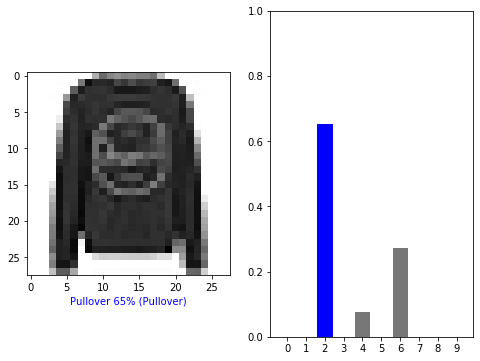

In [0]:
index_i = 17
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plot_image(index_i=index_i, 
           prediction_array=predictions, 
           actual_labels=test_labels, 
           images_tested=test_images)
plt.subplot(1, 2, 2)
plot_confidence_array(index_i=index_i, 
                      prediction_array=predictions, 
                      actual_labels=test_labels)
plt.show()

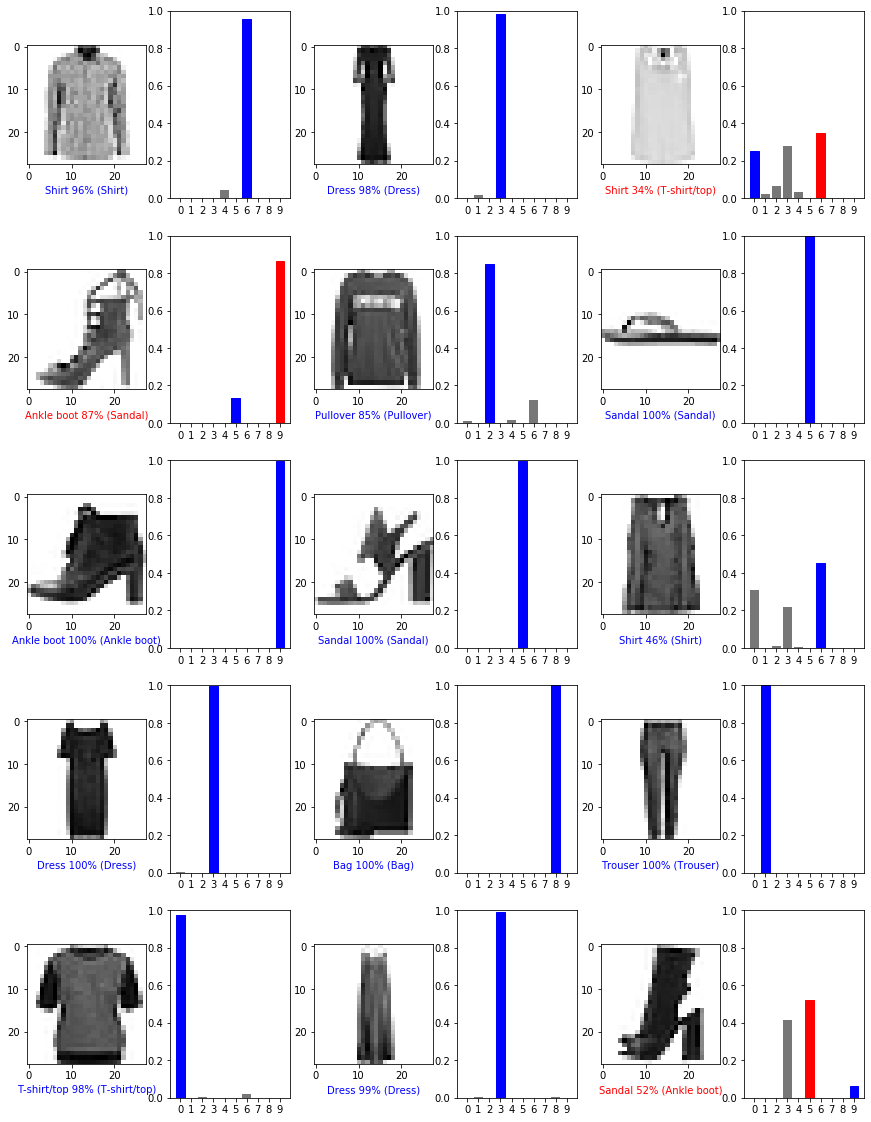

In [0]:
num_rows = 5
num_cols = 3
num_imgs = num_rows * num_cols

plt.figure(figsize=((2*2+1)*num_cols, 2*2*num_rows))
for index_of_img in range(num_imgs):
  plt.subplot(num_rows, 2*num_cols, 2*index_of_img+1)
  plot_image(index_i=index_of_img, 
             prediction_array=predictions, 
             actual_labels=test_labels, 
             images_tested=test_images)
  plt.subplot(num_rows, 2*num_cols, 2*index_of_img+2)
  plot_confidence_array(index_i=index_of_img, 
                        prediction_array=predictions, 
                        actual_labels=test_labels)

In [0]:
test_final_1_img = test_images[0]
print(test_final_1_img.shape)

test_final_1_img = np.array([test_final_1_img])
print(test_final_1_img.shape)

(28, 28, 1)
(1, 28, 28, 1)


In [0]:
prediction_single = model_1.predict(test_final_1_img)
print(prediction_single)

[[4.3019099e-05 3.4977628e-08 1.1649070e-03 4.2734384e-05 4.3407023e-02
  8.0071928e-08 9.5533854e-01 1.3658116e-09 3.6591664e-06 1.8849214e-10]]


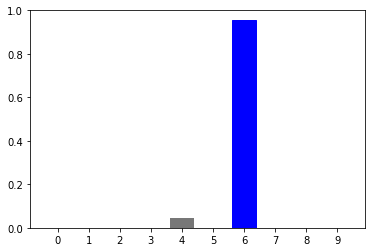

In [0]:
plot_confidence_array(index_i=0, 
                      prediction_array=prediction_single, 
                      actual_labels=test_labels)

In [0]:
print(np.argmax(prediction_single))

if np.argmax(prediction_single) == test_labels[0]:
  print(True, '--> ', class_names[np.argmax(prediction_single)])

6
True -->  Shirt
